In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import datetime
import pickle

In [3]:
path = r'D:\coding\bitbucket_repo_dl\data_mail\2021\ml_task_A\data\train.csv' 

with open(path, 'r') as my_file:
    df = pd.read_csv(my_file, delimiter=',')
users = [([]) for i in range(15000)]
for i in range(len(df)):
    row = df.values[i]
    users[int(row[0])].append(int(row[1]))



In [24]:
for i in range(3):
    print(users[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[63, 53, 66, 10, 42, 67, 27, 47, 17, 21, 68, 35, 69, 25, 13, 37, 29, 70, 71, 72, 34, 49, 32, 73, 74, 15, 75, 76, 7, 77, 57, 8, 48, 56, 18, 78, 79, 59, 80, 81, 82, 83, 84, 85, 86, 87, 41, 88, 89, 90, 23, 91]
[7, 14, 58, 3, 27, 65, 48, 63, 17, 94, 31, 95, 96, 11, 97, 38, 19, 98, 90, 66, 25, 99, 100, 4, 24, 57, 30, 33, 101, 78, 102, 103, 34, 42, 43, 104, 47, 105, 53, 106, 76, 88, 2, 107, 21, 92, 108, 109, 110, 111, 59, 51]


In [4]:
max_item = np.max(users)
max_item = max(max_item)
print(max_item)

max_len = 0
for u in users:
    if len(u) > max_len:
        max_len = len(u)
print(max_len)
        

190
65


C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0


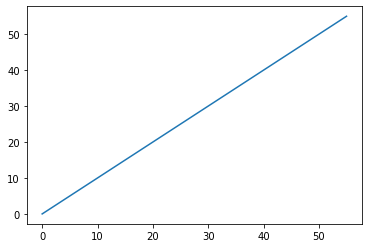

1


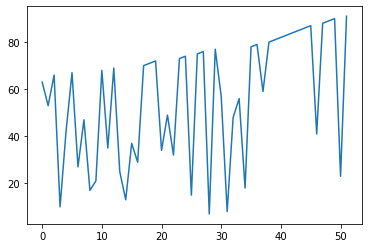

2


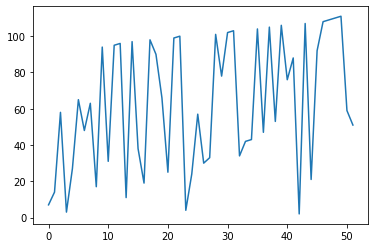

In [25]:
for i, u in enumerate(users):
    if i > 2: break
    print(i)
    fig, ((ax1)) = plt.subplots(nrows=1, ncols=1)
    ax1.plot(u)
    plt.show()

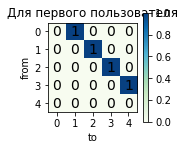

In [8]:
def visualize_confusion_matrix(confusion_matrix, title, shape = (2,2)):
    """
    Visualizes confusion matrix
    
    confusion_matrix: np array of ints, x axis - predicted class, y axis - actual class
                      [i][j] should have the count of samples that were predicted to be class i,
                      but have j in the ground truth
                     
    """
    # Adapted from 
    # https://stackoverflow.com/questions/2897826/confusion-matrix-with-number-of-classified-misclassified-instances-on-it-python
    assert confusion_matrix.shape[0] == confusion_matrix.shape[1]
    size = confusion_matrix.shape[0]
    fig = plt.figure(figsize=shape)
    plt.title(title)
    plt.ylabel("from")
    plt.xlabel("to")
    res = plt.imshow(confusion_matrix, cmap='GnBu', interpolation='nearest')
    cb = fig.colorbar(res)
    plt.xticks(np.arange(size))
    plt.yticks(np.arange(size))
    for i, row in enumerate(confusion_matrix):
        for j, count in enumerate(row):
            plt.text(j, i, count, fontsize=14, horizontalalignment='center', verticalalignment='center')
    
confusion_matrix_first_user = np.zeros((5,5), int)
for u in users:
    for i in range(len(u) - 1):
        if u[i] > 4 or u[i+1]>4:
            continue
        confusion_matrix_first_user[u[i]][u[i+1]] += 1
    break
visualize_confusion_matrix(confusion_matrix_first_user,'Для первого пользователя')

In [9]:
def predict(confusion_matrix, item_id):
    row = confusion_matrix[item_id]
    mx = np.argmax(row)
    return mx, row[mx]

for i in range(5):
    print(i, ' -> ', predict(confusion_matrix_first_user, i))


0  ->  (1, 1)
1  ->  (2, 1)
2  ->  (3, 1)
3  ->  (4, 1)
4  ->  (0, 0)


In [19]:
#v2 - 119.296 баллов
path = r'D:\coding\bitbucket_repo_dl\data_mail\2021\ml_task_A\data\v2\near_user'
with open(path, 'rb') as file:
    near_user = pickle.load(file)
print(near_user)

confusion_matrix1 = np.zeros((191, 191), int)
confusion_matrix2 = np.zeros((191, 191), int)
for i_usr, u in enumerate(users):
    if i_usr in near_user:
        cm = confusion_matrix1
    else:
        cm = confusion_matrix2
    for i in range(len(u) - 1):        
        cm[u[i]][u[i+1]] += 1

In [26]:
#v3 - 115.704 баллов
path = r'D:\coding\bitbucket_repo_dl\data_mail\2021\ml_task_A\data\v3\near_user1'
with open(path, 'rb') as file:
    near_user1 = pickle.load(file)
print(near_user1)
path = r'D:\coding\bitbucket_repo_dl\data_mail\2021\ml_task_A\data\v3\near_user2'
with open(path, 'rb') as file:
    near_user2 = pickle.load(file)
print(near_user2)
confusion_matrix = np.zeros((191, 191), int)
confusion_matrix2 = np.zeros((191, 191), int)
confusion_matrix2 = np.zeros((191, 191), int)
for i_usr, u in enumerate(users):
    if i_usr in near_user1:
        cm = confusion_matrix1
    elif i_usr in near_user2:
        cm = confusion_matrix2
    else:
        cm = confusion_matrix
    for i in range(len(u) - 1):        
        cm[u[i]][u[i+1]] += 1

[1, 2, 4, 7, 8, 11, 13, 14, 15, 22, 25, 27, 33, 42, 43, 47, 52, 55, 57, 58, 59, 61, 63, 64, 65, 66, 68, 70, 74, 75, 76, 80, 81, 82, 83, 84, 85, 86, 89, 92, 94, 96, 98, 99, 102, 104, 113, 115, 116, 122, 127, 131, 132, 133, 134, 137, 141, 142, 145, 146, 147, 150, 153, 157, 160, 161, 162, 164, 169, 170, 172, 173, 174, 175, 178, 182, 183, 188, 191, 195, 199, 202, 203, 206, 207, 208, 210, 211, 213, 215, 216, 219, 220, 222, 225, 229, 231, 232, 233, 234, 236, 238, 241, 242, 244, 246, 248, 252, 254, 257, 259, 261, 266, 268, 272, 273, 274, 276, 280, 283, 284, 285, 287, 290, 292, 299, 301, 302, 303, 309, 310, 313, 317, 318, 319, 326, 329, 332, 335, 338, 340, 343, 345, 350, 351, 357, 358, 359, 361, 362, 370, 371, 374, 376, 377, 378, 382, 385, 388, 389, 390, 391, 393, 394, 395, 397, 399, 402, 403, 407, 411, 414, 415, 416, 419, 420, 423, 428, 433, 440, 442, 443, 446, 448, 451, 452, 453, 459, 461, 462, 466, 468, 473, 477, 478, 479, 480, 481, 482, 484, 485, 494, 495, 505, 508, 509, 510, 511, 517, 520

In [27]:
for i in range(10):
    for j in range(10):
        print(confusion_matrix1[i][j], end=' ')
    print()
for i in range(10):
    for j in range(10):
        print(confusion_matrix2[i][j], end=' ')
    print()
for i in range(10):
    for j in range(10):
        print(confusion_matrix[i][j], end=' ')
    print()
              
for i in range(191):
    print(i, ' -> ', predict(confusion_matrix1, i))
for i in range(191):
    print(i, ' -> ', predict(confusion_matrix2, i))
for i in range(191):
    print(i, ' -> ', predict(confusion_matrix, i))

0 88 11 3 43 33 0 42 24 0 
42 0 43 186 201 145 74 148 147 71 
6 49 0 65 87 36 12 69 53 43 
11 266 80 0 213 175 50 155 84 99 
22 212 65 136 0 143 98 176 155 115 
10 144 39 161 170 0 37 195 166 98 
15 23 29 73 75 46 0 79 80 28 
27 169 46 238 199 111 62 0 161 104 
23 134 82 142 160 174 67 178 0 118 
17 68 28 154 97 84 11 127 87 0 
0 28 7 1 19 13 0 14 10 0 
12 0 17 78 69 59 26 56 53 29 
2 19 0 23 37 14 4 25 23 15 
1 84 30 0 73 67 12 71 34 35 
8 78 19 36 0 53 46 46 71 55 
6 50 23 53 68 0 19 75 66 34 
7 13 11 29 19 20 0 29 28 8 
11 67 14 84 71 27 24 0 71 40 
11 52 16 46 56 54 31 70 0 38 
3 28 8 68 31 32 7 41 37 0 
0 7 1 0 7 4 0 5 2 2 
7 0 3 20 8 9 5 19 6 11 
0 5 0 2 4 2 1 6 4 4 
1 30 11 0 17 9 3 8 12 18 
1 16 4 14 0 14 9 23 20 9 
0 5 4 12 14 0 3 19 18 16 
1 3 0 7 5 6 0 5 4 6 
2 13 2 20 10 12 4 0 9 4 
2 6 3 7 14 21 9 14 0 7 
2 6 1 18 11 3 0 12 8 0 
0  ->  (1, 88)
1  ->  (19, 329)
2  ->  (66, 183)
3  ->  (19, 383)
4  ->  (19, 351)
5  ->  (53, 316)
6  ->  (56, 101)
7  ->  (19, 369)
8  ->  (19, 

In [28]:
list_prediction_random = np.random.randint(0,191,45000)
list_prediction = np.zeros((45000), int)
for i in range(15000):
    list_prediction[i*3] = users[i][-1]
print(list_prediction[:20])

for i in range(15000):
    if i in near_user1: cm = confusion_matrix1
    elif i in near_user2: cm = confusion_matrix2
    else: cm = confusion_matrix
    list_prediction[i*3] = predict(cm, list_prediction[i*3])[0]   
print(list_prediction[:20])

for i in range(15000):
    if i in near_user1: cm = confusion_matrix1
    elif i in near_user2: cm = confusion_matrix2
    else: cm = confusion_matrix
    list_prediction[i*3+1] = predict(cm, list_prediction[i*3])[0]    
print(list_prediction[:20])

for i in range(15000):
    if i in near_user1: cm = confusion_matrix1
    elif i in near_user2: cm = confusion_matrix2
    else: cm = confusion_matrix
    list_prediction[i*3+2] = predict(cm, list_prediction[i*3+1])[0]    
print(list_prediction[:20])

[ 55   0   0  91   0   0  51   0   0   4   0   0 138   0   0 143   0   0
  92   0]
[ 19   0   0 120   0   0  18   0   0  19   0   0  88   0   0  63   0   0
  19   0]
[ 19  47   0 120  66   0  18  66   0  19  47   0  88  35   0  63  17   0
  19  47]
[ 19  47 120 120  66  17  18  66  17  19  47 120  88  35  39  63  17  19
  19  47]


In [29]:
work_dir = 'D:/coding/bitbucket_repo_dl/data_mail/2021/ml_task_A/'

with open(work_dir + 'data/sample-submission.csv', 'r') as my_file:
    df_res = pd.read_csv(my_file, delimiter=',')
df_res.item_id = list_prediction
df_res.to_csv(work_dir+f'answers/v3/result_{datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S")}.csv', index=False)


In [8]:
user_likehood = np.zeros((15000, 15000), int)
user_likehood_proc = np.zeros((15000, 15000), float)
for i in range(15000):
    for j in range(i, 15000):
        s = len(set(users[i]) & set(users[j]))
        user_likehood[i][j] = s
        user_likehood_proc[i][j] = s / len(users[i])
        user_likehood_proc[j][i] = s / len(users[j])
        

In [22]:

for i in range(10):
    for j in range(10):
        print(user_likehood[i][j], end=' ')
    print()
#for i in range(0, 15000, 30):
#    print(list(map(int, user_likehood[0][i:i+30])))

#for i in range(0, 15000, 30):
#    print(list(map(lambda x: 0 if x < 0.5 else 1, user_likehood_proc[0][i:i+30])))
for i in range(0, 15000, 30):
    print(list(map(lambda x: 0 if x < 0.41 else 1, user_likehood_proc[1][i:i+30])))    

56 22 23 25 22 29 26 20 25 13 
0 52 18 17 20 22 20 16 22 9 
0 0 52 20 21 23 19 15 18 14 
0 0 0 45 22 26 21 17 25 10 
0 0 0 0 51 23 22 17 26 13 
0 0 0 0 0 54 25 18 25 8 
0 0 0 0 0 0 51 16 24 12 
0 0 0 0 0 0 0 38 17 7 
0 0 0 0 0 0 0 0 57 9 
0 0 0 0 0 0 0 0 0 27 
[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0

In [ ]:
means = np.zeros((15000))
for i in range(15000):
    m = np.mean(user_likehood[i][i:])
    #print(m)
    means[i] = m
print(np.mean(means))

c25 = 0
c30 = 0
c35 = 0
c40 = 0
c45 = 0
for i in range(15000):
    for j in range(i+1, 15000):
        if user_likehood[i][j] >= 45: c45 += 1
        elif user_likehood[i][j] >= 40: c40 += 1
        elif user_likehood[i][j] >= 35: c35 += 1
        elif user_likehood[i][j] >= 30: c30 += 1
        elif user_likehood[i][j] >= 25: c25 += 1
print(c25,c30,c35,c40,c45)